# 正則化: 回帰係数の可視化

今まで、RidgeとLassoの概念を文字ベースで説明してきましたが、

それぞれの正則化において、回帰係数はどう収束するかをグラフから確認していきます。

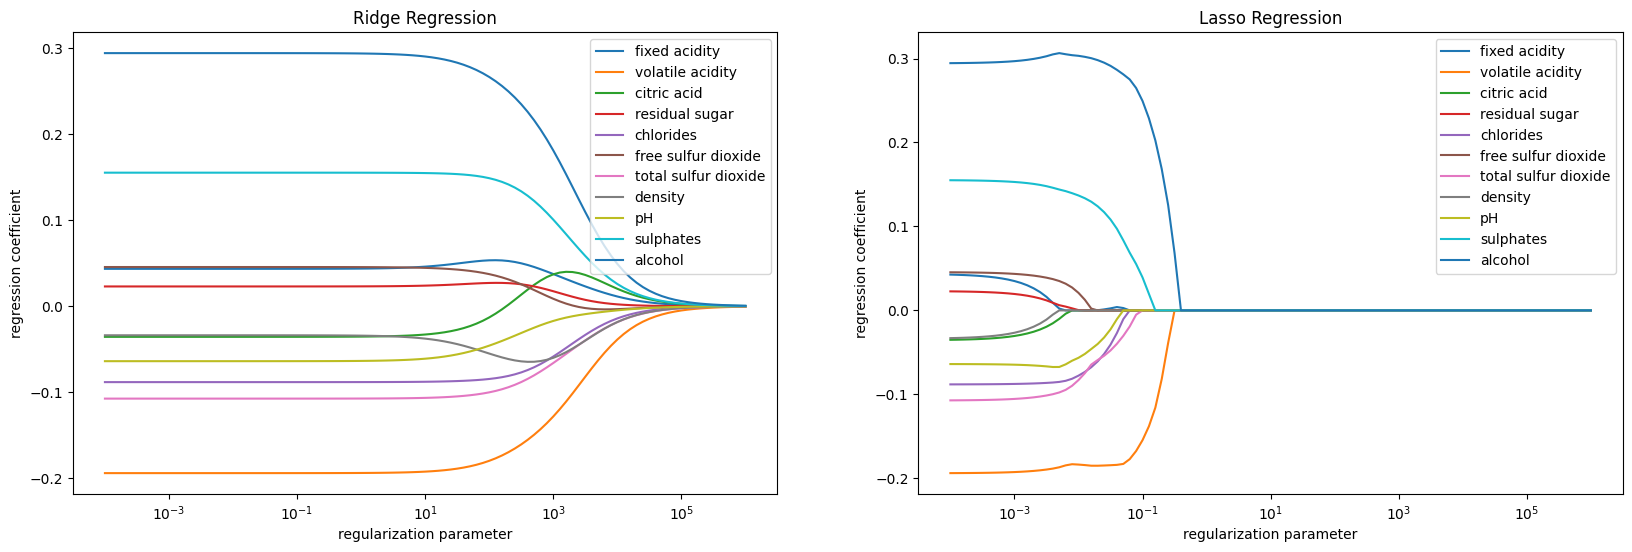

<Figure size 640x480 with 0 Axes>

In [1]:
from cProfile import label
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import preprocessing

# ignore warning message
import warnings
warnings.filterwarnings('ignore')

# import data
df= pd.read_csv('data/winequality-red.csv',sep=';')
# drop result quality
df1 = df.drop(columns='quality')
y = df['quality'].values.reshape(-1,1)
scaler = preprocessing.StandardScaler()
# regularization parameter
alpha = 10 ** (-4)
X = df1.values
X_fit = scaler.fit_transform(X)
# result storage
df_ridge = pd.DataFrame(columns=np.append(df1.columns,'alpha'))
df_lasso = pd.DataFrame(columns=np.append(df1.columns,'alpha'))
while alpha <= 10 ** 6 + 1:
    # Ridge
    model_ridge = linear_model.Ridge(alpha=alpha)
    model_ridge.fit(X_fit,y)
    tmp_se = pd.Series(np.append(model_ridge.coef_[0],alpha),index=df_ridge.columns)
    df_ridge = df_ridge.append(tmp_se,ignore_index=True)
    # Lasso
    model_lasso = linear_model.Lasso(alpha=alpha)
    model_lasso.fit(X_fit,y)
    tmp_se = pd.Series(np.append(model_lasso.coef_,alpha),index=df_lasso.columns)
    df_lasso = df_lasso.append(tmp_se,ignore_index=True)
    alpha = alpha * 10 ** (0.1)

plt.figure(figsize=(20, 6)) # figureの縦横の大きさ
plt.subplot(1,2,1)
for column in df_ridge.drop(columns = 'alpha'):
    plt.plot(df_ridge['alpha'],df_ridge[column], label=df_ridge[column].name)    
plt.xscale('log')
plt.title('Ridge Regression')
plt.xlabel('regularization parameter')
plt.ylabel('regression coefficient')
plt.legend()

plt.subplot(1,2,2)
for column in df_lasso.drop(columns = 'alpha'):
    plt.plot(df_lasso['alpha'],df_lasso[column], label=df_lasso[column].name)
plt.xscale('log')
plt.title('Lasso Regression')
plt.xlabel('regularization parameter')
plt.ylabel('regression coefficient')
plt.legend()
plt.show()
plt.clf()


グラフからも前回の結論を得られます：

Ridgeの方は、alphaが増加するにつれ、Ridge回帰は少しずつ回帰係数を小さくしていきます。

しかし、Lasso回帰は影響度の小さい説明変数の回帰係数を0にする特徴があります。